In [145]:
###########import packages##########
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
%matplotlib
###########fix random seed for reproducability##########
seed=2
np.random.seed(seed)
###########loading data##########
fdata=pd.read_csv('database.csv',encoding="gbk")
raw_data=fdata.loc[0:,[
                      'Conductivity(OH)30℃',
                      'IEC',
                      'water uptake(%)30℃',
                      'swelling rate(%)30℃',
                      'Maximum elongation (%)',
                      'Maximum stress /Mpa',
                      'Membrane Thickness /um',
                      'Alkali concentration',
                      'Alkali temperature /℃',
                      'Ether Aryl bond',
                      'Alkyl chain',
                      'sulfone',
                      'Spacer',
                      'Ectender',
                      'higher than 88%',#label
]]
###########handling missing values##########

median_raw_data=raw_data.median()
dict_median_raw_data=median_raw_data.to_dict()
data=raw_data.fillna(dict_median_raw_data)

###########train test splitting##########
raw_input=data.iloc[:,0:14]
raw_degradation=data.iloc[:,14]

x=raw_input.values.astype(np.float32)
y=raw_degradation.values.astype(np.float32)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.15,random_state=seed)
###########building the decision tree##########
model=tree.DecisionTreeClassifier()
param = {
         'max_depth':range(15,20),    
         'criterion':np.array(['entropy','gini']),
        }
grid = GridSearchCV(model,param_grid=param,cv=5)
grid.fit(x_train,y_train.astype(int))
model=grid.best_estimator_


Using matplotlib backend: Qt5Agg


In [146]:
###########graphviz was chosen to generate the graph of the decision tree,install it in anaconda and the official website before use##########
import graphviz
###########giving feature names##########
dot_data=tree.export_graphviz(model,
                              out_file=None,
                              feature_names=[
                              'Conductivity(OH)30℃',
                              'IEC',
                              'water uptake(%)30℃',
                              'swelling rate(%)30℃',
                              'Maximum elongation (%)',
                              'Maximum stress /Mpa',
                              'Membrane Thickness /um',
                              'Alkali concentration',
                              'Alkali temperature /℃',
                              'Ether Aryl bond',
                              'Alkyl chain',
                              'sulfone',
                              'Spacer',
                              'Ectender',],
                              filled=True,
                              rounded=True,
                              special_characters=True,
                              class_names=['No','Yes'])
graph=graphviz.Source(dot_data)

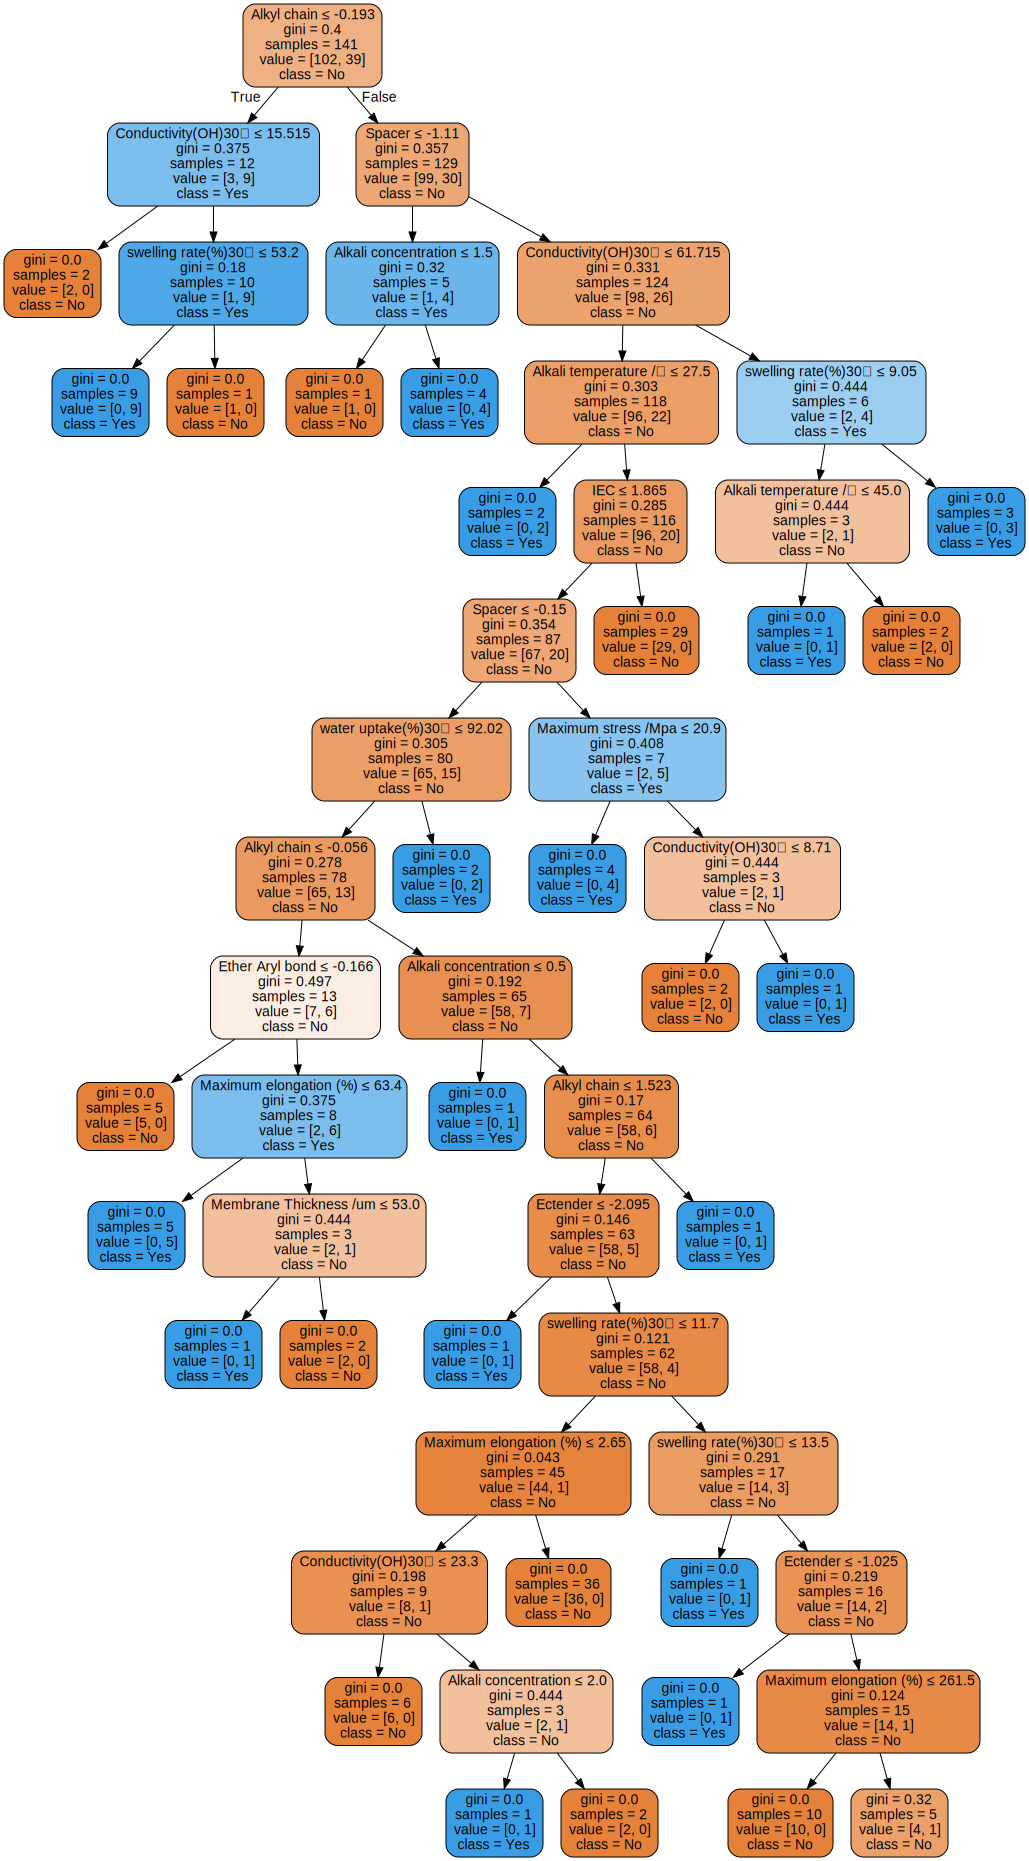

In [147]:
###########visualization##########
graph

In [148]:
###########generating confusion matrix to evaluate the prediction accuracy##########
from sklearn.metrics import accuracy_score
prediction_train=model.predict(x_train)
prediction_test=model.predict(x_test)
print(classification_report(y_train,prediction_train))
print(classification_report(y_test,prediction_test))

             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00       102
        1.0       1.00      0.97      0.99        39

avg / total       0.99      0.99      0.99       141

             precision    recall  f1-score   support

        0.0       0.92      0.63      0.75        19
        1.0       0.42      0.83      0.56         6

avg / total       0.80      0.68      0.70        25



In [153]:
feature_names=[
        'Conductivity(OH)30℃',
        'IEC',
        'water uptake(%)30℃',
        'swelling rate(%)30℃',
        'Maximum elongation (%)',
        'Maximum stress /Mpa',
        'Membrane Thickness /um',
        'Alkali concentration',
        'Alkali temperature /℃',
        'Ether Aryl bond',
        'Alkyl chain',
        'sulfone',
        'Spacer',
        'Ectender'
                ]
def plot_importance(x,model):
    features = model.feature_importances_
    labels = x
    _ = {'labels':labels,'features':features}
    df = pd.DataFrame(_)
    df= df.set_index('labels').sort_values(by='features',ascending=False)
    df.plot.bar(rot=45)

best_model=grid.best_estimator_
print(best_model.feature_importances_)
plot_importance(feature_names,best_model)
plt.show()

[ 0.12970736  0.04193029  0.04939913  0.09414681  0.03850599  0.02779379
  0.02431957  0.08300222  0.07344197  0.06313734  0.18714805  0.
  0.12625855  0.06120892]


In [152]:
###########generate a PDF file containing the figure
graph.render('decisiontree-constant')

'decisiontree-constant.pdf'

In [149]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_true = y_train, y_pred = prediction_train)
cm2 = confusion_matrix(y_true = y_test, y_pred = prediction_test)
print(cm1)
print(cm2)

[[102   0]
 [  1  38]]
[[12  7]
 [ 1  5]]
